# Change Making

In this problem, we want tot use as few coins as possible to make $n$ cents. In everday life, we use a greedy algorithm.(Chooses what looks best at that moment, one step at a time. Small, shortsighted decisions)

In [1]:
# This function returns the coins a human would use to make n cents.
# It always uses the largest coin that it can.
def greedy_change(n, coins):
    change = []
    for coin in sorted(coins, reverse=True): 
        while coin <= n:
            change.append(coin)
            n -= coin
    return change

In [2]:
print(greedy_change(67, [25, 10, 5, 1])) # [25, 25, 10, 5, 1, 1]

[25, 25, 10, 5, 1, 1]


This is a provably optimal algorithm in realistic coin systems, but not in arbitrary coin systems.

In [3]:
print(greedy_change(12, [25, 10, 5, 1]))

[10, 1, 1]


In [4]:
# This is a counterexample because the optimal solution is [6, 6]
print(greedy_change(12, [25, 10, 6, 1]))

[10, 1, 1]


One way to be sure we get an optimal solution is to look at all possible solutions and choose the best one.

In [5]:
# This function returns the optimal coins to make n cents.
# It considers all possible coin combinations, which takes exponential time.
def combinatorial_change(n, coins):
    if n == 0:
        return []
    best = None
    for coin in coins:
        if coin <= n:
            change = [coin] + combinatorial_change(n-coin, coins)
            if best is None or len(change) < len(best):
                best = change
            
    return best

In [6]:
# This is a counterexample because the optimal solution is [6, 6]
print(combinatorial_change(12, [25, 10, 6, 1]))
# print(combinatorial_change(67, [25, 10, 6, 1])) # too slow to finish

[6, 6]


This is very slow because it solves the same subproblems repeatedly. What if we could just solve each subproblem once?

In [7]:
# This function returns the optimal coins to make n cents.
# It uses dynamic programming to achieve a polynomial running time (work up from subproblems)
def dynamic_change(n, coins):
    sub = dict()
    sub[0] = []
    
    # Subproblems: sub[i] will be the optimal coins to make i cents.
    for i in range(1, n + 1):
        for coin in coins:
            if coin <= i:
                change = [coin] + sub[i - coin]
                if i not in sub or len(change) < len(sub[i]):
                    sub[i] = change
                    
    # The overall solution is just the final subproblem solution.
    return sub[n]

In [8]:
# Testing
print(dynamic_change(12, [25, 10, 6, 1]))
print(dynamic_change(67, [25, 10, 6, 1]))

[6, 6]
[25, 25, 10, 6, 1]


We can improve a bit further by storing just aa few pieces of information about each subproblem solution.

In [9]:
# This function returns the optimal coins to make n cents
# The algorithm is O(nk) where k = len(coins).
def best_change(n, coins):
    sub = dict()
    sub[0] = (0, None)
    
    # Subproblems: sub[i] (optimal number of coins to make i cents, one of those coins)
    for i in range(1, n + 1):
        for coin in coins:
            if coin <= i:
                number = 1 + sub[i - coin][0]
                if i not in sub or number < sub[i][0]:
                    sub[i] = (number, coin)
                    
    # To construct the overall solution we trace backwards from the final subproblem
    change = []
    while n > 0:
        coin = sub[n][1]
        change.append(coin)
        n -= coin
    
    return change

In [10]:
# Testing
print(best_change(12, [25, 10, 6, 1]))
print(best_change(67, [25, 10, 6, 1]))

[6, 6]
[25, 25, 10, 6, 1]


In [11]:
# This function times a change-makng function on a range of problem sizes.
def timer(change, sizes):
    times = []
    for n in sizes:
        time = %timeit -n1 -r1 -o -q change(n, [25, 10, 5, 1])
        times.append(time.average)
    return times

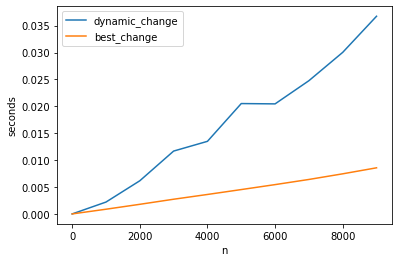

In [21]:
# This code plots some times
from matplotlib import pyplot
from numpy import arange

# n = arange(1, 30)
n = arange(1, 10_000, 1000)

# pyplot.plot(n, timer(combinatorial_change, n), label="combinatorial_change")
pyplot.plot(n, timer(dynamic_change, n), label="dynamic_change")
pyplot.plot(n, timer(best_change, n), label="best_change")

pyplot.ylabel("seconds")
pyplot.xlabel("n")
pyplot.legend()
pyplot.show()

Going from exponential to polynomial time is the most important thing, but improving the way we store solutions does make a difference.